In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
filepath =  '/content/drive/My Drive/Colab Notebooks/Datasets/DSDP - indian_food.csv'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(filepath, sep=',')

In [ ]:
data.head(50)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


In [ ]:
data.dtypes

name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object

In [ ]:
#checking for -1s
for column in data.columns:
    if data[column].dtype == 'object':
        count = data[data[column] == '-1'].shape[0]
    else:
        count = data[data[column] == -1].shape[0]
    print(f"{column}: {count}")

name: 0
ingredients: 0
diet: 0
prep_time: 30
cook_time: 28
flavor_profile: 29
course: 0
state: 24
region: 13


In [ ]:
data['flavor_profile'].replace('-1', 'Unknown', inplace=True)
data['state'].replace('-1', 'Unknown', inplace=True)
data['region'].replace('-1', 'Unknown', inplace=True)

In [ ]:
data['prep_time'].replace(-1, np.nan, inplace=True)
data['cook_time'].replace(-1, np.nan, inplace=True)

data['prep_time'] = data['prep_time'].fillna(round(data['prep_time'].mean())).astype(int)
data['cook_time'] = data['cook_time'].fillna(round(data['cook_time'].mean())).astype(int)

In [ ]:
#after dealing with -1s
for column in data.columns:
    if data[column].dtype == 'object':
        count = data[data[column] == '-1'].shape[0]
    else:
        count = data[data[column] == -1].shape[0]
    print(f"{column}: {count}")

name: 0
ingredients: 0
diet: 0
prep_time: 0
cook_time: 0
flavor_profile: 0
course: 0
state: 0
region: 0


In [ ]:
data.dtypes

name                 object
ingredients          object
diet                 object
prep_time             int64
cook_time             int64
flavor_profile       object
course               object
state                object
region               object
ingredients_count     int64
dtype: object

In [ ]:
data.head(50)

In [ ]:
def count_ingredients(ingredients):
    return len(ingredients.split(','))

data['ingredients_count'] = data['ingredients'].apply(count_ingredients)

In [ ]:
from collections import Counter

all_ingredients = []
for ingredients in data['ingredients']:
    all_ingredients.extend(ingredients.split(','))

counter = Counter(all_ingredients)
print(counter.most_common())
print(counter.most_common()[:-11:-1])

[(' sugar', 44), (' ginger', 29), (' garam masala', 27), (' ghee', 25), (' curry leaves', 25), (' jaggery', 18), (' urad dal', 17), ('Rice flour', 16), (' milk', 15), (' tomato', 15), (' garam masala powder', 12), (' mustard oil', 12), ('Chana dal', 11), (' sesame seeds', 11), (' saffron', 10), (' turmeric', 10), (' coconut', 10), ('Whole wheat flour', 10), (' clarified butter', 9), (' cardamom', 9), (' gram flour', 9), (' mustard seeds', 9), (' lemon juice', 8), (' garlic', 8), (' potato', 8), ('Urad dal', 8), (' baking soda', 7), ('Rice', 7), (' salt', 7), ('Wheat flour', 7), (' tomatoes', 7), (' butter', 7), (' all purpose flour', 7), ('Moong dal', 7), (' bengal gram flour', 7), (' grated coconut', 7), (' raisins', 6), (' curd', 6), ('Milk', 6), ('Chhena', 6), (' cream', 6), (' semolina', 6), (' chillies', 6), (' kasuri methi', 6), (' cashew nuts', 6), (' green chili', 6), (' lemon', 6), (' gur', 6), (' oil', 5), (' nuts', 5), (' fennel seeds', 5), (' wheat flour', 5), (' chili powd

In [ ]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,ingredients_count
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,8
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East,2
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North,9
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,Unknown,Unknown,4
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East,3
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,Unknown,Unknown,4


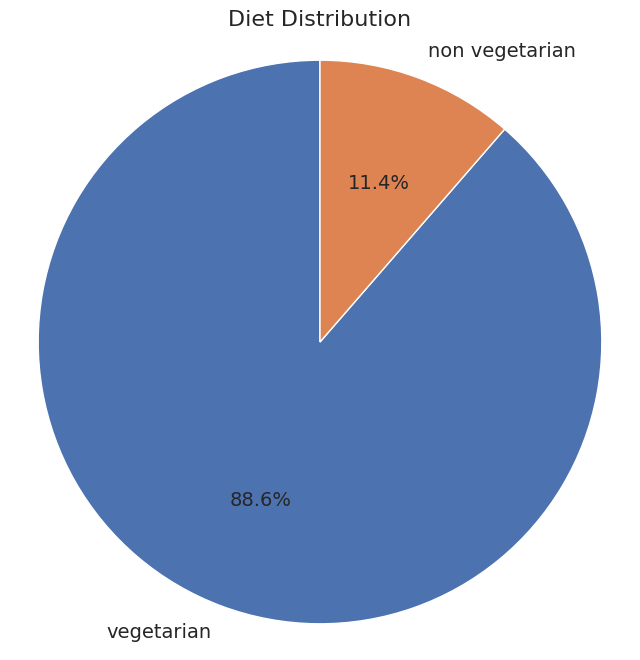

In [ ]:
# Calculate the number of vegetarian and non-vegetarian dishes
diet_counts = data['diet'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(diet_counts, labels=diet_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Diet Distribution', fontsize=16)
plt.axis('equal')
plt.show()

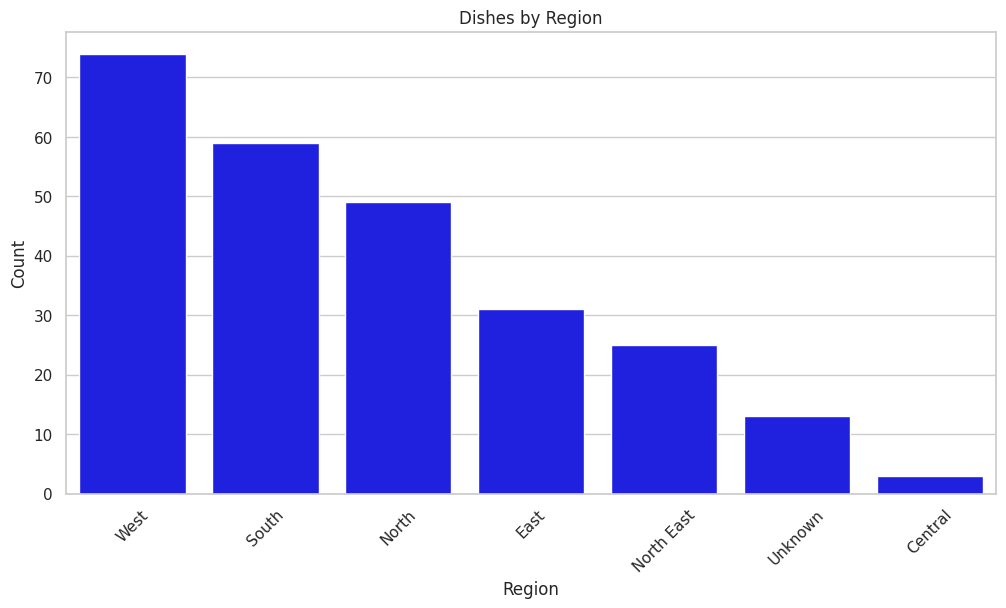

In [ ]:
region_counts = data['region'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts, color='blue')
plt.title('Number of Dishes by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

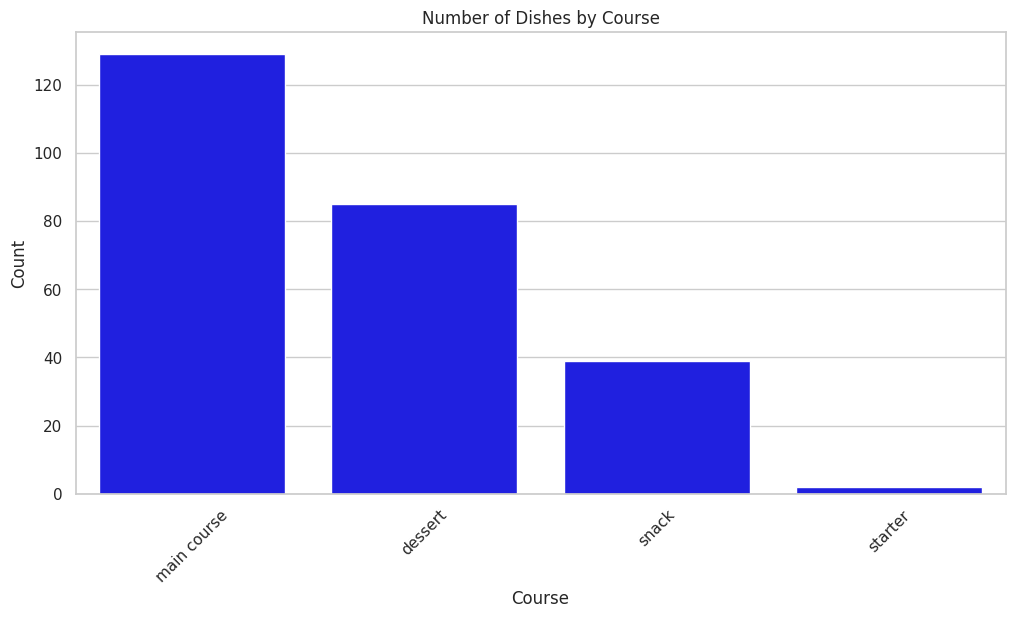

In [ ]:
course_counts = data['course'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=course_counts.index, y=course_counts, color='blue')
plt.title('Number of Dishes by Course')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

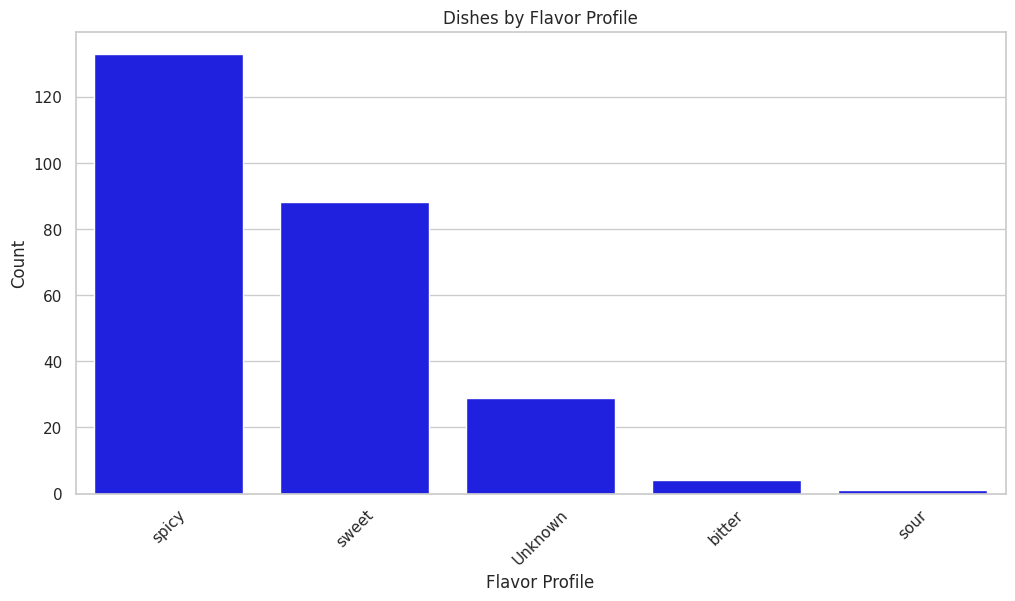

In [ ]:
flavor_counts = data['flavor_profile'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=flavor_counts.index, y=flavor_counts, color='blue')
plt.title('Number of Dishes by Flavor Profile')
plt.xlabel('Flavor Profile')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

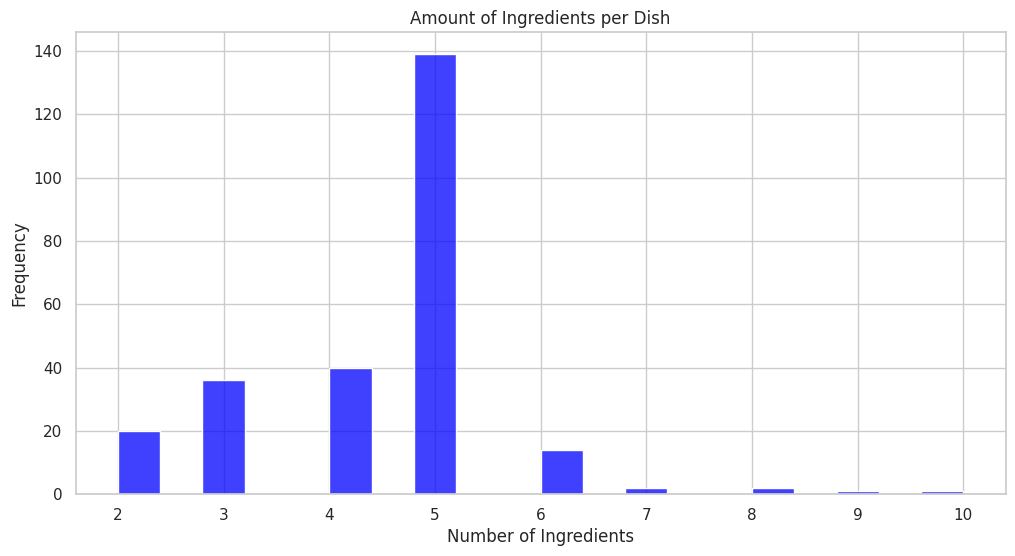

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['ingredients_count'], bins=20, kde=False, color='blue')
plt.title('Amount of Ingredients per Dish')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


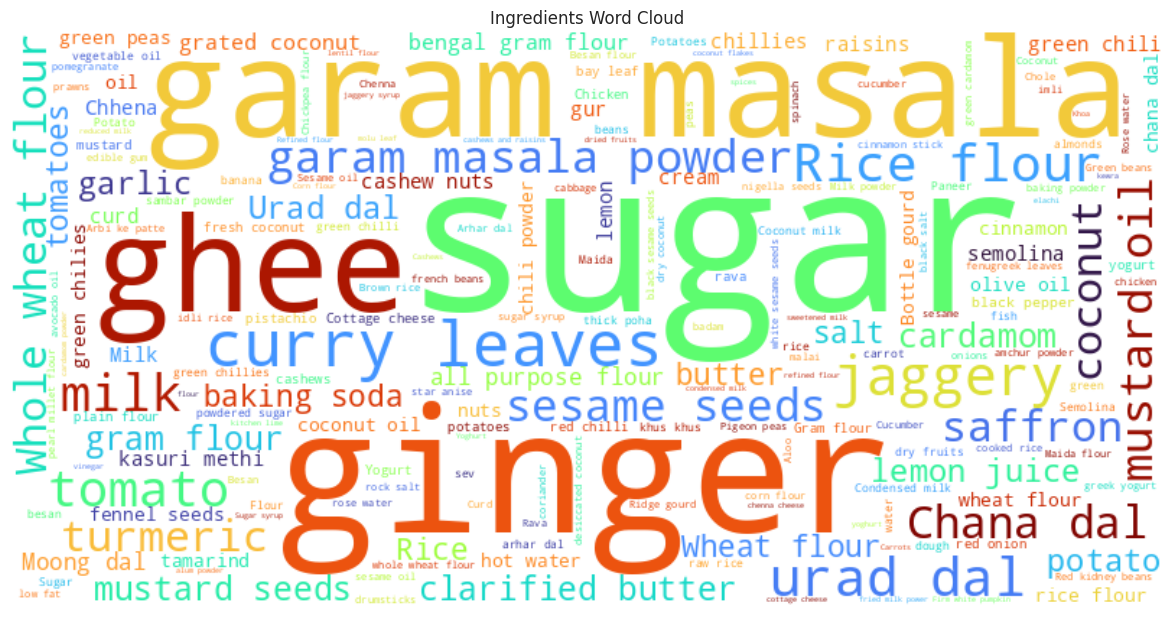

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='turbo', relative_scaling=0.5)
wordcloud.generate_from_frequencies(frequencies=dict(counter))

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ingredients Word Cloud")
plt.show()

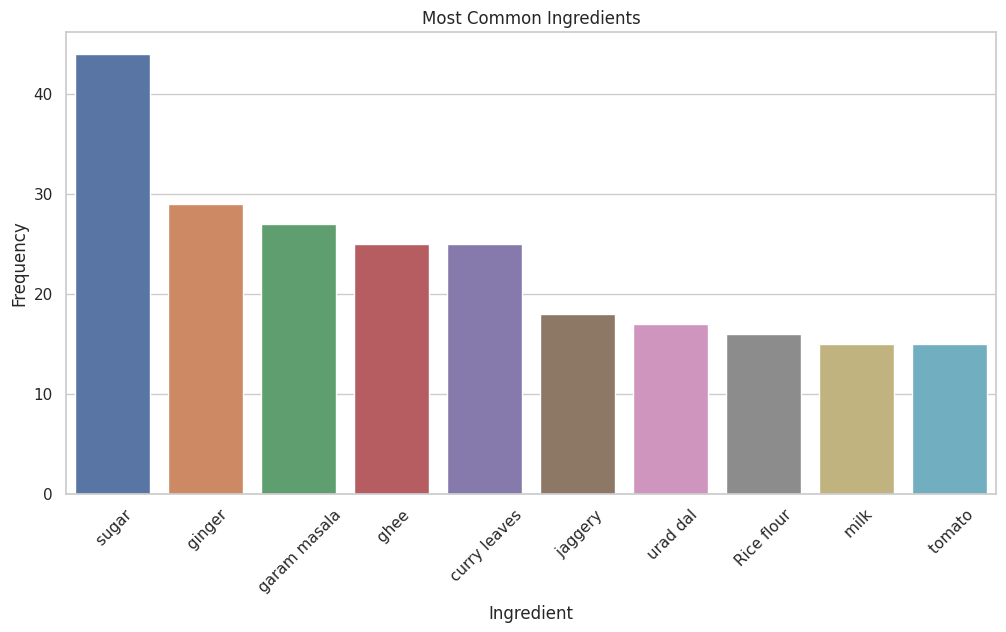

In [ ]:
most_common_ingredients = counter.most_common(10)
# Plotting most common ingredients
plt.figure(figsize=(12, 6))
sns.barplot(x=[item[0] for item in most_common_ingredients], y=[item[1] for item in most_common_ingredients])
plt.title('Most Common Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

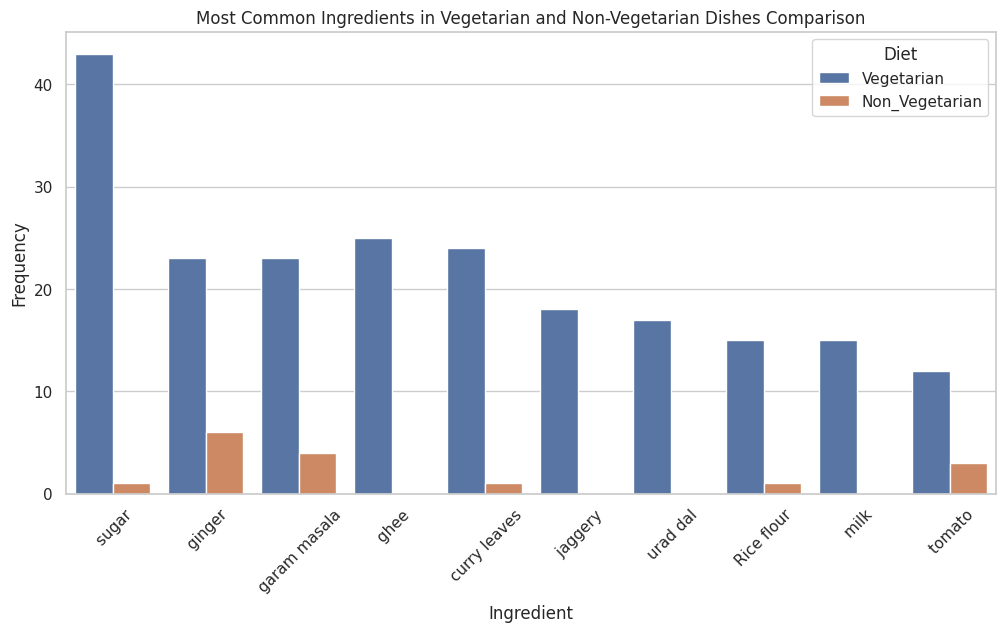

In [ ]:
# Calculate the frequencies of the most common ingredients in vegetarian and non-vegetarian dishes
veg_ingredient_counts = {ingredient: count_ingredient_occurrences(ingredient, veg_data['ingredients']) for ingredient, _ in most_common_ingredients}
non_veg_ingredient_counts = {ingredient: count_ingredient_occurrences(ingredient, non_veg_data['ingredients']) for ingredient, _ in most_common_ingredients}

# Create a DataFrame with the calculated frequencies
comparison_df = pd.DataFrame({'Ingredient': list(veg_ingredient_counts.keys()),
                              'Vegetarian': list(veg_ingredient_counts.values()),
                              'Non_Vegetarian': list(non_veg_ingredient_counts.values())})

# Melt the DataFrame to long format for easier plotting
comparison_melted = comparison_df.melt(id_vars='Ingredient', var_name='Diet', value_name='Frequency')

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Ingredient', y='Frequency', hue='Diet', data=comparison_melted)
plt.title('Most Common Ingredients in Vegetarian and Non-Vegetarian Dishes Comparison')
plt.xlabel('Ingredient')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from itertools import combinations

pairwise_counts = {}

for ingredients in data['ingredients']:
    ingredient_list = ingredients.split(',')
    for pair in combinations(ingredient_list, 2):
        pair = tuple(sorted(pair))
        pairwise_counts[pair] = pairwise_counts.get(pair, 0) + 1

In [ ]:
pairwise_counts_df = pairwise_counts_df.reset_index()
pairwise_counts_df.columns = ['Ingredient Pair', 'Frequency']
pairwise_counts_df[['Ingredient 1', 'Ingredient 2']] = pd.DataFrame(pairwise_counts_df['Ingredient Pair'].tolist(), index=pairwise_counts_df.index)
pairwise_counts_df.drop(columns=['Ingredient Pair'], inplace=True)

In [ ]:
N = 20  # You can change this value to display more or fewer combinations
top_combinations = pairwise_counts_df.sort_values('Frequency', ascending=False).head(N)

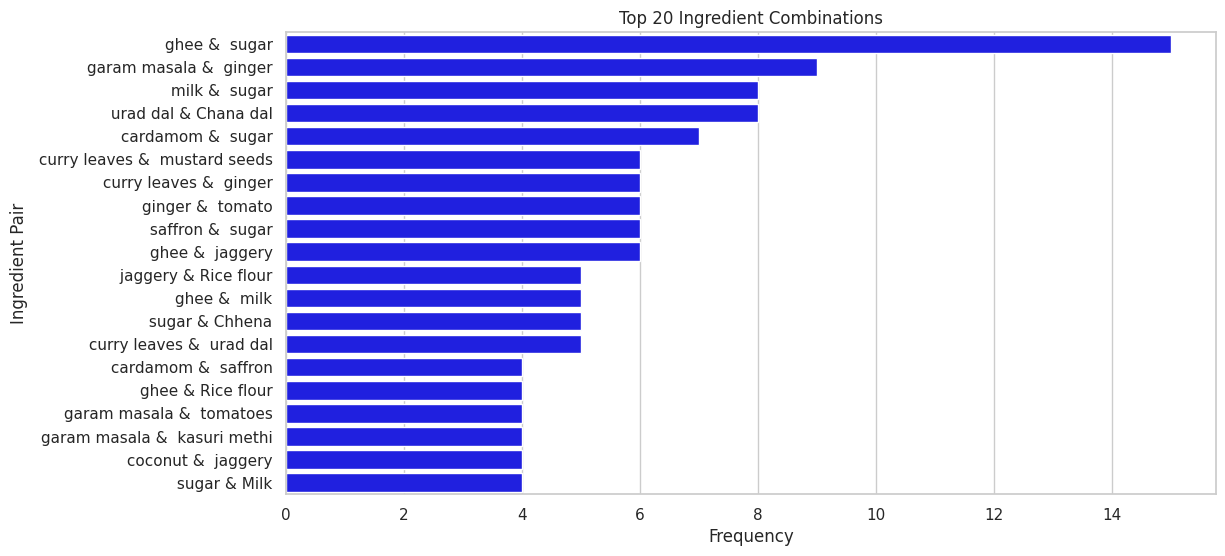

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_combinations, x='Frequency', y=top_combinations.apply(lambda row: f"{row['Ingredient 1']} & {row['Ingredient 2']}", axis=1), color='blue')
plt.title(f'Top {N} Ingredient Combinations')
plt.xlabel('Frequency')
plt.ylabel('Ingredient Pair')
plt.show()

In [ ]:
data['total_time'] = data['prep_time'] + data['cook_time']

In [ ]:
mc_df = data[data['course'] == 'main course']
long_mc_df = mc_df.sort_values('total_time', ascending=False).head(20)

In [ ]:
import plotly.express as px

fig = px.bar(long_mc_df, y='name', x='total_time',
             orientation='h', color='total_time',
             labels={'name': 'Main Course', 'total_time': 'Total Time to make (Minutes)'},
             color_continuous_scale='Burg')
fig.show()

In [ ]:
d_df = data[data['course'] == 'dessert']
long_d_df = d_df.sort_values('total_time', ascending=False).head(20)

In [ ]:
fig = px.bar(long_d_df, y='name', x='total_time',
             orientation='h', color='total_time',
             labels={'name': 'Dessert', 'total_time': 'Total Time to make (Minutes)'},
             color_continuous_scale='Burg')
fig.show()

In [ ]:
s_df = data[data['course'] == 'snack']
long_s_df = s_df.sort_values('total_time', ascending=False).head(20)

In [ ]:
fig = px.bar(long_s_df, y='name', x='total_time',
             orientation='h', color='total_time',
             labels={'name': 'Dessert', 'total_time': 'Total Time to make (Minutes)'},
             color_continuous_scale='Burg')
fig.show()

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('cook_time ~ state', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)

In [ ]:
print(anova_table)

             df         sum_sq      mean_sq         F   PR(>F)
state      24.0   16966.404289   706.933512  0.303893  0.99946
Residual  230.0  535040.027083  2326.260987       NaN      NaN


In [ ]:
model = ols('cook_time ~ diet', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)

In [ ]:
print(anova_table)

             df         sum_sq      mean_sq         F    PR(>F)
diet        1.0      17.609737    17.609737  0.008071  0.928485
Residual  253.0  551988.821636  2181.773999       NaN       NaN


In [ ]:
model = ols('cook_time ~ ingredients_count', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=1)

In [ ]:
print(anova_table)

                      df         sum_sq      mean_sq        F    PR(>F)
ingredients_count    1.0      14.791538    14.791538  0.00678  0.934443
Residual           253.0  551991.639835  2181.785138      NaN       NaN


In [ ]:
data_dummy = pd.get_dummies(data, columns=['state', 'diet', 'flavor_profile', 'course', 'region'], drop_first=True)

In [ ]:
import statsmodels.api as sm

X = data_dummy.drop(['name', 'ingredients', 'prep_time', 'cook_time'], axis=1)
X = sm.add_constant(X)  # Add a constant term to the independent variables
y = data_dummy['cook_time']

model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              cook_time   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     4.778
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           9.67e-14
Time:                        16:42:11   Log-Likelihood:                -1265.1
No. Observations:                 255   AIC:                             2606.
Df Residuals:                     217   BIC:                             2741.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    42.48

<ipython-input-147-435b098663a7>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




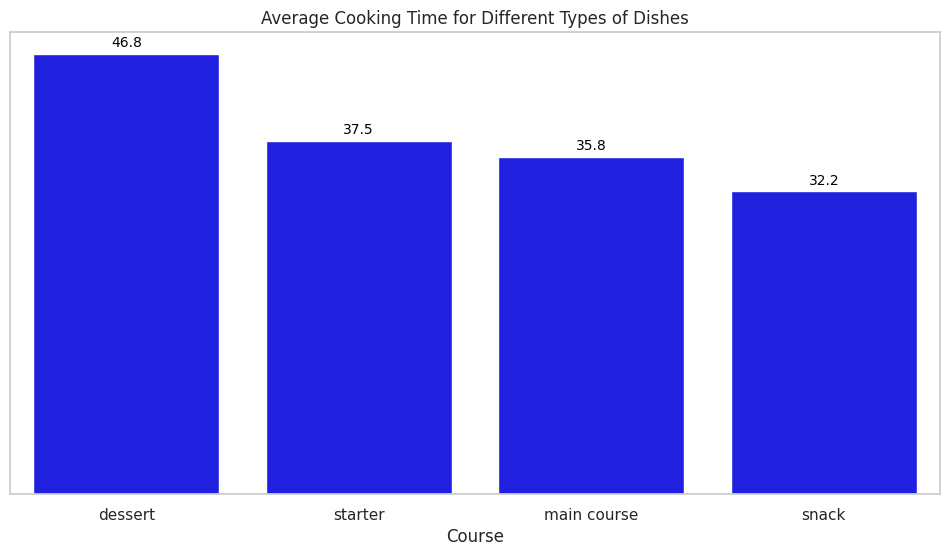

In [ ]:
plt.figure(figsize=(12, 6))
data_sorted_course = data.groupby('course')['cook_time'].mean().sort_values(ascending=False).reset_index()
ax = sns.barplot(x='course', y='cook_time', data=data_sorted_course, ci=None, color='blue')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Cooking Time for Different Types of Dishes')
plt.xlabel('Course')
plt.ylabel('Average Cooking Time (minutes)')
plt.gca().axes.yaxis.set_visible(False)
plt.show()

<ipython-input-151-b4279bcce9dc>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




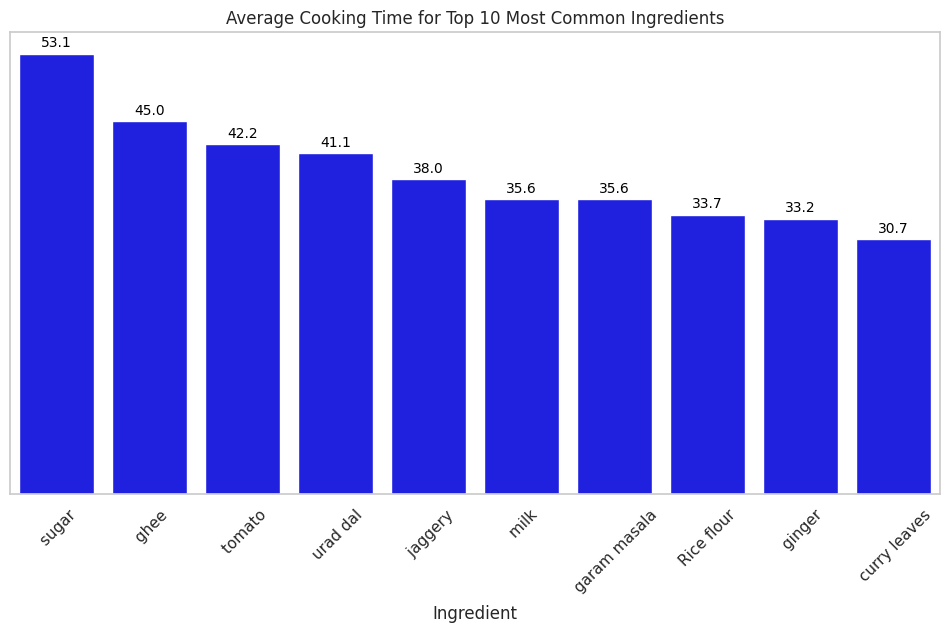

In [ ]:
ingredients_df = pd.DataFrame(counter.most_common(10), columns=['Ingredient', 'Frequency'])
top_ingredients = ingredients_df['Ingredient'].tolist()

data['ingredient_list'] = data['ingredients'].apply(lambda x: x.split(','))
ingredient_cooktime = []

for ingredient in top_ingredients:
    ingredient_cooktime.append(data[data['ingredient_list'].apply(lambda x: ingredient in x)]['cook_time'].mean())

ingredient_cooktime_df = pd.DataFrame({'Ingredient': top_ingredients, 'Average Cooking Time': ingredient_cooktime})

plt.figure(figsize=(12, 6))
ingredient_cooktime_df_sorted = ingredient_cooktime_df.sort_values('Average Cooking Time', ascending=False)
ax = sns.barplot(x='Ingredient', y='Average Cooking Time', data=ingredient_cooktime_df_sorted, ci=None, color='blue')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Cooking Time for Top 10 Most Common Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Average Cooking Time (minutes)')
plt.xticks(rotation=45)
plt.gca().axes.yaxis.set_visible(False)
plt.show()

<ipython-input-153-10dc28b627f9>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




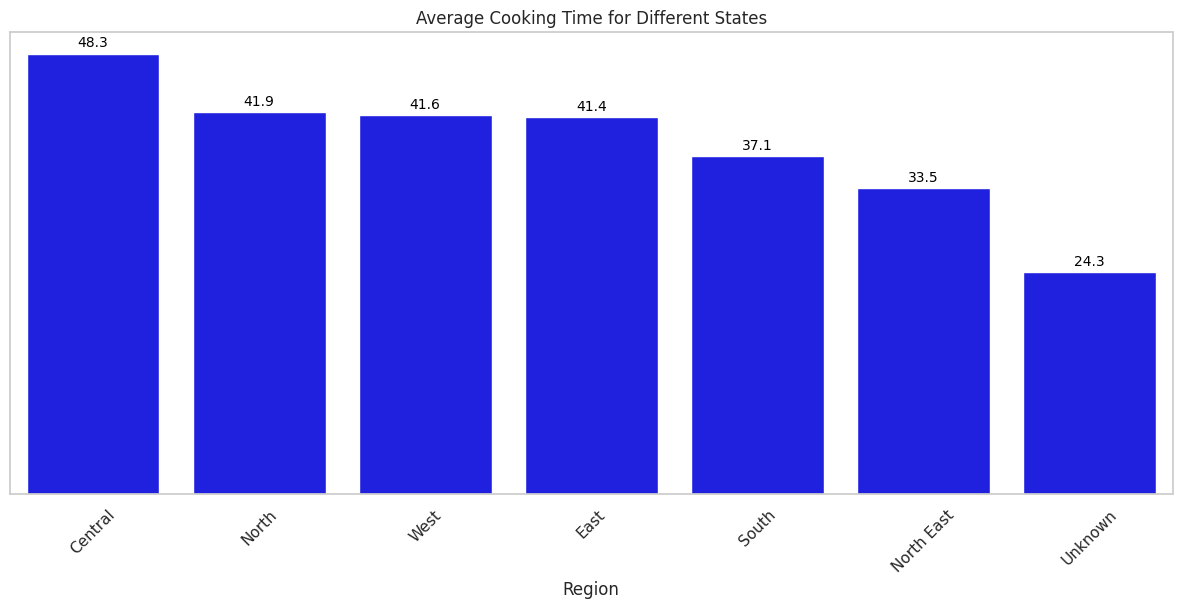

In [ ]:
plt.figure(figsize=(15, 6))
data_sorted_state = data.groupby('region')['cook_time'].mean().sort_values(ascending=False).reset_index()
ax = sns.barplot(x='region', y='cook_time', data=data_sorted_state, ci=None, color='blue')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Cooking Time for Different States')
plt.xlabel('Region')
plt.ylabel('Average Cooking Time (minutes)')
plt.xticks(rotation=45)
plt.gca().axes.yaxis.set_visible(False)
plt.show()

<ipython-input-154-6ce02ee34bff>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




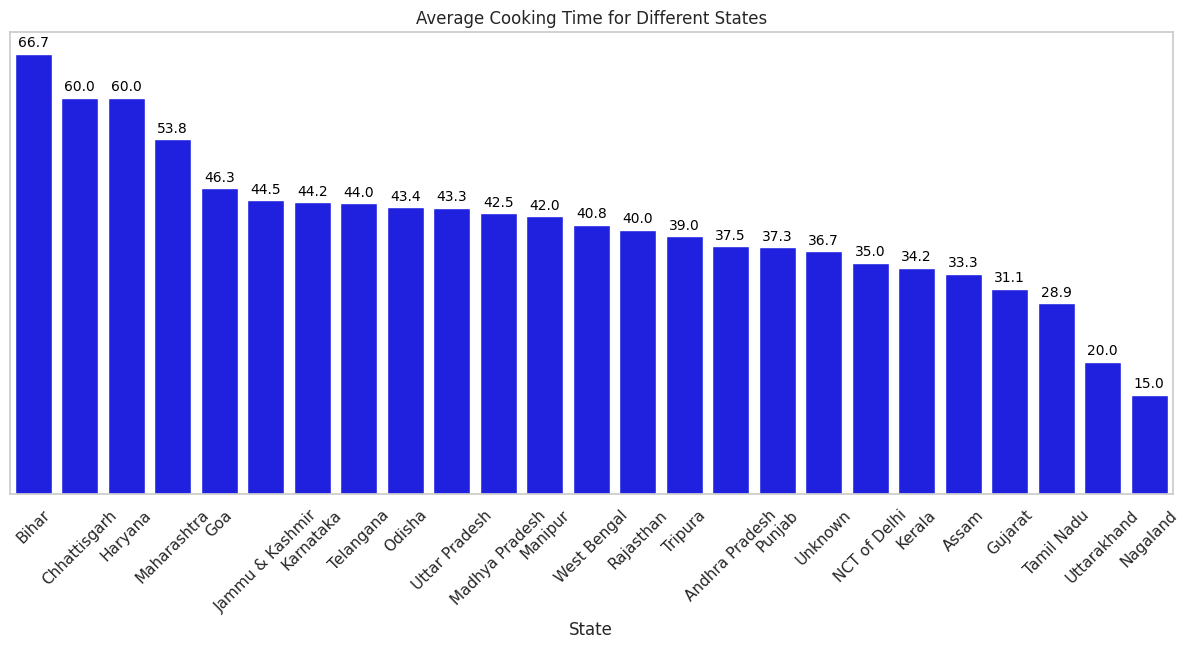

In [ ]:
plt.figure(figsize=(15, 6))
data_sorted_state = data.groupby('state')['cook_time'].mean().sort_values(ascending=False).reset_index()
ax = sns.barplot(x='state', y='cook_time', data=data_sorted_state, ci=None, color='blue')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Cooking Time for Different States')
plt.xlabel('State')
plt.ylabel('Average Cooking Time (minutes)')
plt.xticks(rotation=45)
plt.gca().axes.yaxis.set_visible(False)
plt.show()

<ipython-input-155-a5fdd33d3e69>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




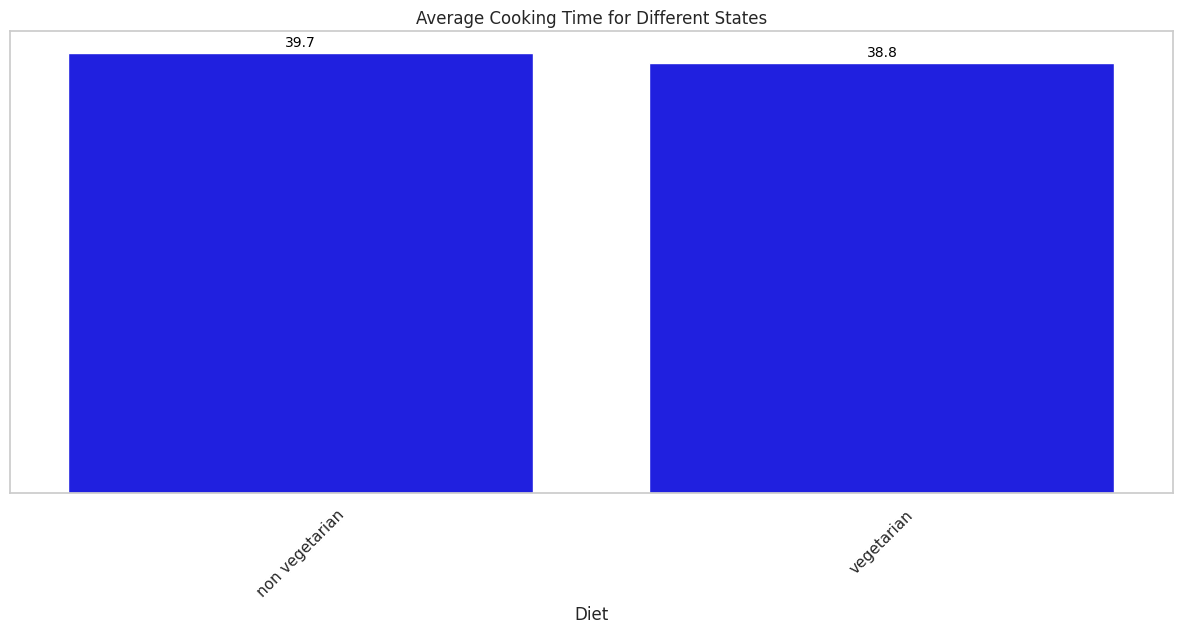

In [ ]:
plt.figure(figsize=(15, 6))
data_sorted_state = data.groupby('diet')['cook_time'].mean().sort_values(ascending=False).reset_index()
ax = sns.barplot(x='diet', y='cook_time', data=data_sorted_state, ci=None, color='blue')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Cooking Time for Different States')
plt.xlabel('Diet')
plt.ylabel('Average Cooking Time (minutes)')
plt.xticks(rotation=45)
plt.gca().axes.yaxis.set_visible(False)
plt.show()

We have a set of 255 traditional Indian dishes, with a list of ingredients, cooking times, and other important details. The task is for you to perform exploratory data analysis and visualize any key differences and similarities between the dishes. Submit a PPT, as well as other files you used for visualizing (R, Python, Tableau, etc.)

- Data cleaning
    - Are there dishes from undefined regions? Are there dishes with undefined flavors?
    - What should we do with them?
- Ingredients Variety
    - Amount of ingredients per dish
    - What ingredients are used the most
    - What ingredients are used the least
    - Where are these ingredients found? How much are they?
    - Are the most/least/common ingredients found different in different types of dishes? cultures? non-vegetarian vs. vegetarian?
- Similar Ingredients and Dishes
    - What dishes have similar ingredients? Similar can mean that they share exactly the same ingredients (but in different amounts or different ways of preparation), or at least most ingredients are the same?
    - What ingredients usually go together? What are the highest (and lowest) combos of ingredients? Combos can be pairs, trios, etc.
    - Are they from similar parts of India?
- Prep and Cooking Time
    - What are the longest and quickest dishes to make?
    - Does the amount of ingredients affect cooking time? Does the place affect cooking time? Do any other factors affect it? Perform ANOVA and/or regression analysis to find out.
    - What kind of dishes take long to cook? Dessert? Main course? etc?
    - If something takes longer to prepare, does it make it easier/faster to cook?
    - What's the average time it takes to cook a dish? Does this differ for different types of dishes? Different types of ingredients? Different places?
- Locations and Flavor Distributions
    - Learn more about how Regions and States in India are set up. Find a way to visualize the different kinds of flavors against the different states/regions. Do certain regions specialize in spicy, standard, etc. flavors? Do certain regions have more traditional dishes than others?